<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da14_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. Colab 가상머신에 한글 폰트 설치

In [265]:
# Colab Jupyter Notebook에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum    # sudo : 관리자 권한을 가져옴. -y : 전부다 허용 font-nanum : 나눔 폰트 설치
!sudo fc-cache -fv  # fc-cache : 캐쉬 데이터 관련 작업 진행
!rm ~/.cache/matplotlib -rf # rm : 삭제 -rf: 하위 폴더 전부

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## Step 2. Colab Runtime 재시작(Ctrl + M)

## Step 3. `matplotlib.pyplot` 모듈에서 한글 폰트를 사용할 수 있도록 설정.

In [266]:
import matplotlib.pyplot as plt

# matplotlib.pyplot 모듈에서 사용할 폰트 패밀리 한글로 설정
plt.rc('font', family='NanumBarunGothic')

한글 폰트 테스트

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns

In [268]:
df = pd.DataFrame(data={
    '구':['서초구', '강남구', '송파구'],
    '가격':[9_000, 10_000, 8_500]
})

In [269]:
df

,구,가격
0,서초구,9000
1,강남구,10000
2,송파구,8500


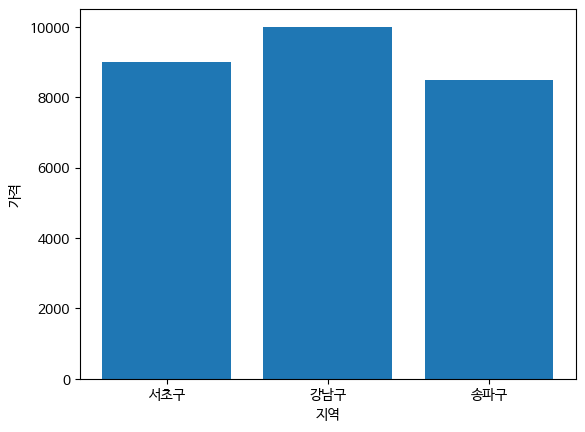

In [270]:
plt.bar(x=df['구'], height=df['가격'])
plt.xlabel('지역')
plt.ylabel('가격')
plt.show()

# 아파트 실거래가 데이터 분석


*   [apt_202504.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   첫 15줄은 파일 설명 문서 -> skip
    *   encoding 파라미터 설정(한글 인코딩: euc-kr)
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    *   '인천광역시 부평구 부평동' -> '인천광역시'
    *   '충청남도 천안시 서북구' -> '충청남도'
*   '시군구' 컬럼의 값을 이용해서, county 파생 변수(시/군/구)를 만듦.
    *   '인천광역시 부평구 부평동' -> '부평구'
    *   '충청남도 천안시 서북구' -> '천안시'
*   '계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 데이터프레임 생성

In [271]:
# path
apt_path = "https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv"

In [272]:
# make df
apt = pd.read_csv(apt_path,
                  encoding='euc-kr',        # encoding : 파일 인코딩 타입 설정
                  skiprows=15,              # skiprows : 파일에서 몇 줄을 생략할 지 설정.
                  thousands=',',            # thousands : 숫자에서 천자리 구분자로 사용된 문자.
                  na_values='-')            # na_values : NA(null)로 취급할 문자열. 기본값 이외에 취급할 문자. '-'만 있으면 nan으로 값 변

In [273]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaN,중개거래,인천 부평구,NaN
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaN,중개거래,인천 미추홀구,NaN
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaN,중개거래,인천 미추홀구,NaN
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaN,직거래,NaN,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaN,중개거래,서울 동대문구,NaN


In [274]:
apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,NaN,27,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 시흥시, 경기 안산시 상록구",NaN
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,NaN,5,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 안산시 상록구, 서울 구로구",NaN
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,NaN,4,개인,개인,1992,선진로 108,NaN,중개거래,경기 안산시 상록구,NaN
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,NaN,12,개인,개인,1995,판교로 669,NaN,중개거래,경기 성남시 분당구,NaN
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,NaN,15,개인,개인,2006,방어진순환도로 733,NaN,중개거래,울산 동구,NaN


In [275]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1.191000e+03
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2.025043e+07
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,3.079995e+01
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2.025040e+07
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2.025041e+07
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2.025042e+07
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2.025043e+07
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2.025051e+07


In [276]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         5074 non-null   object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   1191 non-null   float64
 17  거래유형      36974 non-null  object 
 18  중개사소재지    33763 non-null  object 
 19  등기일자      5659 non-null   object 
dtypes: float64(2), int64(8), obj

In [277]:
# 가격 컬럼 숫자 타입 변환
# apt['거래금액(만원)']=apt['거래금액(만원)'].str.split(',').str.join('').astype(int)

In [278]:
apt['거래금액(만원)'].info()        # int

<class 'pandas.core.series.Series'>
RangeIndex: 36974 entries, 0 to 36973
Series name: 거래금액(만원)
Non-Null Count  Dtype
--------------  -----
36974 non-null  int64
dtypes: int64(1)
memory usage: 289.0 KB


In [279]:
apt['해제사유발생일'].unique()

array([      nan, 20250430., 20250507., 20250501., 20250506., 20250502.,
       20250504., 20250429., 20250508., 20250505., 20250428., 20250425.,
       20250426., 20250424., 20250503., 20250422., 20250423., 20250421.,
       20250420., 20250427., 20250419., 20250418., 20250417., 20250416.,
       20250415., 20250414., 20250413., 20250412., 20250411., 20250410.,
       20250409., 20250408., 20250407., 20250406., 20250405., 20250404.,
       20250403., 20250402., 20250401.])

In [280]:
apt['등기일자'].unique()

array([nan, '25.04.30', '25.05.01', '25.05.02', '25.04.29', '25.04.28',
       '25.04.25', '25.04.24', '25.04.23', '25.04.22', '25.04.21',
       '25.04.18', '25.04.17', '25.04.16', '25.04.15', '25.04.14',
       '25.04.11', '25.04.10', '25.04.09', '25.04.08', '25.04.07',
       '25.04.04', '25.04.03', '25.04.02', '25.04.01'], dtype=object)

In [281]:
# 해제사유발생일 컬럼의 값들을 날짜 타입으로 변환.
apt['해제사유발생일'] = pd.to_datetime(apt['해제사유발생일'], format='%Y%m%d')

In [282]:
apt['해제사유발생일'].unique()  # datetime을 저장하고 있는 배열

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [283]:
# 등기일자 컬럼의 값들을 날짜 타입으로 변환.
apt['등기일자'] = pd.to_datetime(apt['등기일자'], format='%y.%m.%d')

In [284]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [285]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [286]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [287]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,등기일자
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1191,5659
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2025-04-19 17:06:29.924433152,2025-04-21 06:25:30.588443392
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2025-04-01 00:00:00,2025-04-01 00:00:00
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2025-04-13 00:00:00,2025-04-15 00:00:00
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2025-04-19 00:00:00,2025-04-23 00:00:00
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2025-04-28 00:00:00,2025-04-29 00:00:00
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2025-05-08 00:00:00,2025-05-02 00:00:00
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,NaN,NaN


In [288]:
# 컬럼 이름 바꾸기
apt.rename(columns={'전용면적(㎡)' : '전용면적', '거래금액(만원)' : '거래금액'}, inplace=True)

In [289]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [348]:
apt.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전용면적', '계약년월', '계약일', '거래금액',
       '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지',
       '등기일자', 'province', 'country', 'year', 'month'],
      dtype='object')

## read_csv

In [371]:
apt = pd.read_csv(apt_path,
                  encoding = 'euc-kr',
                  skiprows=15,
                  na_values='-',
                  parse_dates=['해제사유발생일', '등기일자'],   # 해당 컬럼은 날짜로 해석해주세요.
                  date_format ={'해제사유발생일':'%Y%m%d', '등기일자':'%y.%m.%d'},
                  thousands = ',')
# parse_dates 파라미터 : 날짜 포맷으로 해석(parse)할 컬럼(들)의 리스트.
# date_format 파라미터 : {'컬럼이름': '날짜포맷', ...}

In [372]:
apt['해제사유발생일'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [373]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [374]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [375]:
# pd.DataFrame.rename(index={'old_row_label': 'new_row_label', ...}) : 인덱스 이름 변경
# pd.DataFrame.rename(columns={'old_column_name': 'new_column_name'}, ...)  : 컬럼 이름 변경
apt.rename(columns={'전용면적(㎡)': '전용면적'}, inplace=True)

In [376]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


## 데이터 탐색

In [380]:
apt.describe()

,NO,본번,부번,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,등기일자
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1191,5659
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2025-04-19 17:06:29.924433152,2025-04-21 06:25:30.588443392
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2025-04-01 00:00:00,2025-04-01 00:00:00
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2025-04-13 00:00:00,2025-04-15 00:00:00
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2025-04-19 00:00:00,2025-04-23 00:00:00
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2025-04-28 00:00:00,2025-04-29 00:00:00
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2025-05-08 00:00:00,2025-05-02 00:00:00
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,NaN,NaN


In [383]:
# 거래 금액 최솟값, 최댓값인 행
apt[(apt['거래금액(만원)'] == apt['거래금액(만원)'].min()) | (apt['거래금액(만원)'] == apt['거래금액(만원)'].max())]

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
7430,7431,서울특별시 강남구 압구정동,369-1,369,1,"현대2차(10,11,20,23,24,25동)",198.41,202504,23,1050000,NaN,9,개인,개인,1976,압구정로29길 71,NaT,중개거래,서울 강남구,NaT
7698,7699,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,23,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,NaT
9811,9812,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,21,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,2025-04-29


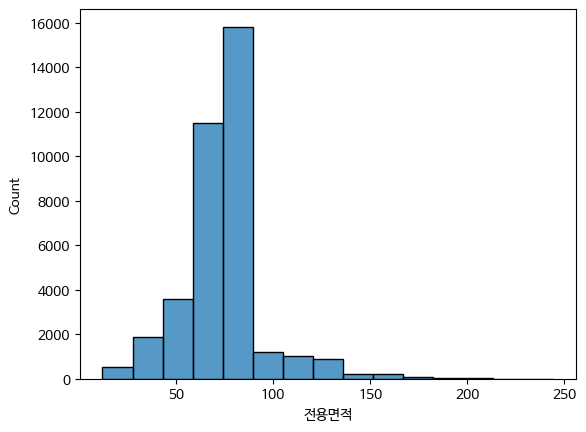

In [386]:
# 전용면적 히스토그램
sns.histplot(data=apt, x='전용면적', bins=15)
plt.show()

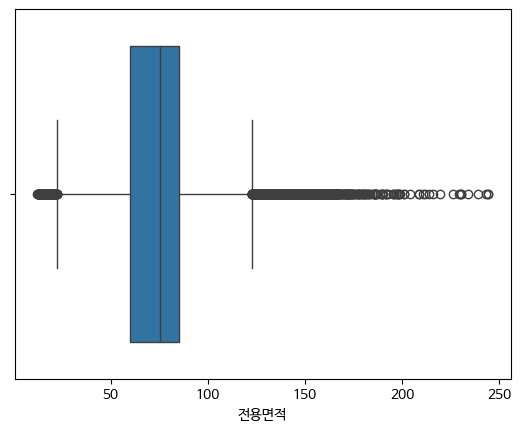

In [388]:
# 전용면적 box plot
sns.boxplot(data=apt, x='전용면적')
plt.show()

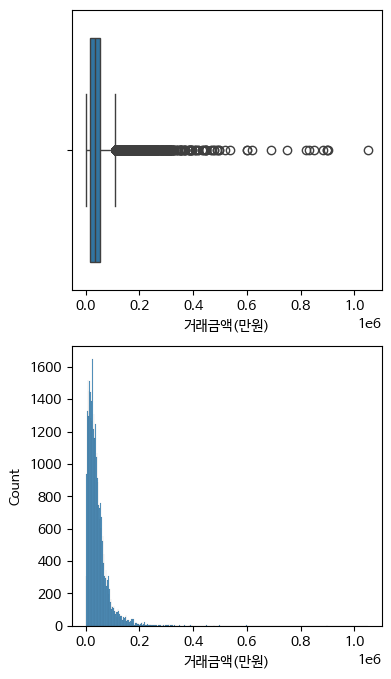

In [397]:
# 거래금액
fig, axes = plt.subplots(nrows=2, figsize=(4,8))

sns.boxplot(data=apt, x='거래금액(만원)', ax=axes[0])
sns.histplot(data=apt, x='거래금액(만원)')

plt.show()

## '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    * '인천광역시 부평구 부평동' -> '인천광역시'
    * '충청남도 천안시 서북구' -> '충청남도'

In [399]:
# 시군구
apt['province'] = apt['시군구'].str.split().str[0]

## '시군구'컬럼의 값을 이용해서, country 파생 변수(시/군/구)를 만듦.
    * '인천광역시 부평구 부평동' -> '부평구'
    * '충청남도 천안시 서북구' -> '천안시'

In [401]:
apt['country'] = apt['시군구'].str.split().str[1]

In [402]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구


## '계약년월'컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    * 202504 -> 2025(year), 4(month)

In [408]:
apt['year'] = apt['계약년월'].astype(str).str[:4]

In [409]:
apt['year'] = apt['계약년월'] // 100

In [410]:
apt['month'] = apt['계약년월'].astype(str).str[4:]

In [411]:
apt['month'] = apt['계약년월'] % 100

In [412]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4


## 서울 아파트 실거래가 분석

In [416]:
seoul_df = apt[apt.province == '서울특별시']

In [421]:
seoul_df.province.unique()

array(['서울특별시'], dtype=object)

In [423]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4004 entries, 3 to 36633
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        4004 non-null   int64         
 1   시군구       4004 non-null   object        
 2   번지        4004 non-null   object        
 3   본번        4004 non-null   int64         
 4   부번        4004 non-null   int64         
 5   단지명       4004 non-null   object        
 6   전용면적      4004 non-null   float64       
 7   계약년월      4004 non-null   int64         
 8   계약일       4004 non-null   int64         
 9   거래금액(만원)  4004 non-null   int64         
 10  동         142 non-null    object        
 11  층         4004 non-null   int64         
 12  매수자       4004 non-null   object        
 13  매도자       4004 non-null   object        
 14  건축년도      4004 non-null   int64         
 15  도로명       4004 non-null   object        
 16  해제사유발생일   134 non-null    datetime64[ns]
 17  거래유형      4004 non

In [426]:
seoul_df.groupby(by=['country'])['거래금액(만원)'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
country,,,,
강남구,58,398812.068966,16000,1050000
강동구,237,112508.016878,10200,233000
강북구,77,67638.311688,8500,112000
강서구,242,84419.214876,9500,201000
관악구,150,79354.666667,10300,125000
광진구,116,128171.293103,13900,317000
구로구,208,70238.942308,10700,165000
금천구,47,62259.574468,8900,115500
노원구,308,59265.746753,29500,144000


## 서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최소값, 최댓값

In [294]:
# 서울특별시 데이터만 출력
seoul = apt[apt['province'] == '서울특별시']

In [296]:
# 구별 아파트 가격의 개수
gu_count = seoul.groupby(by=['country'])['거래금액'].count()

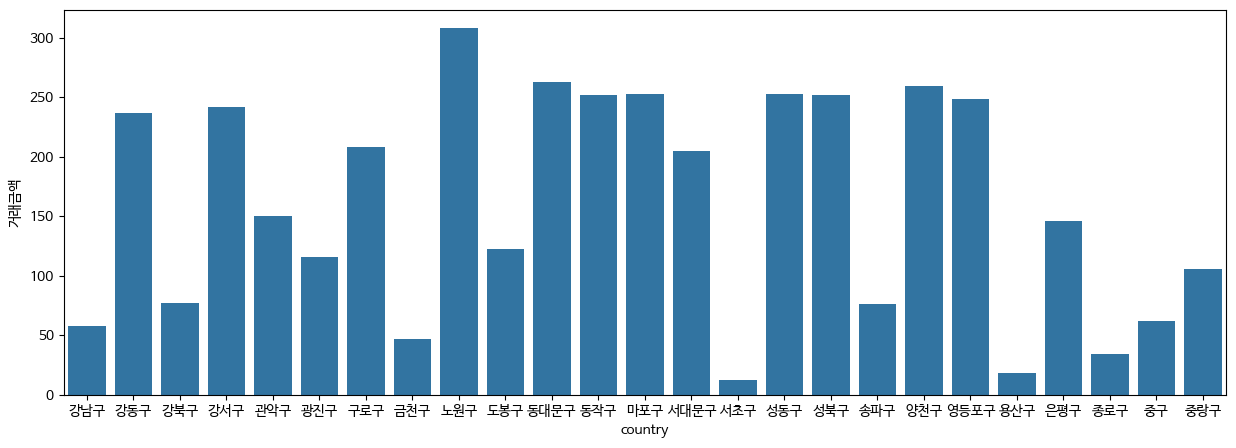

In [297]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_count)
plt.show()

In [298]:
# 구별 아파트 가격의 평균
gu_mean = seoul.groupby(by=['country'])['거래금액'].mean()

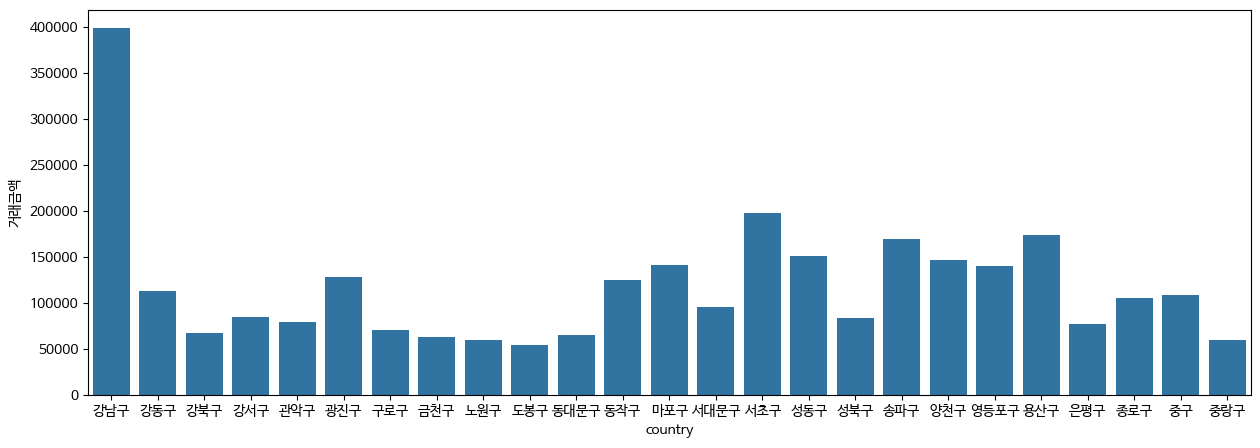

In [299]:
plt.figure(figsize=(15,5))
sns.barplot(gu_mean)
plt.show()

In [300]:
# 구별 아파트 가격의 최솟값
gu_min = seoul.groupby(by=['country'])['거래금액'].min()

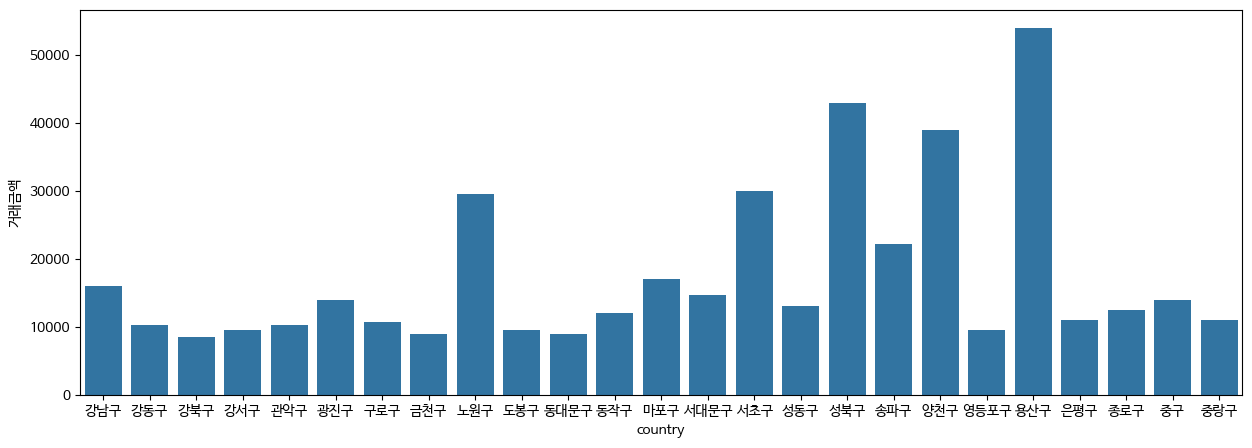

In [301]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_min)
plt.show()

In [302]:
# 구별 아파트 가격의 최댓값
gu_max = seoul.groupby(by=['country'])['거래금액'].max()

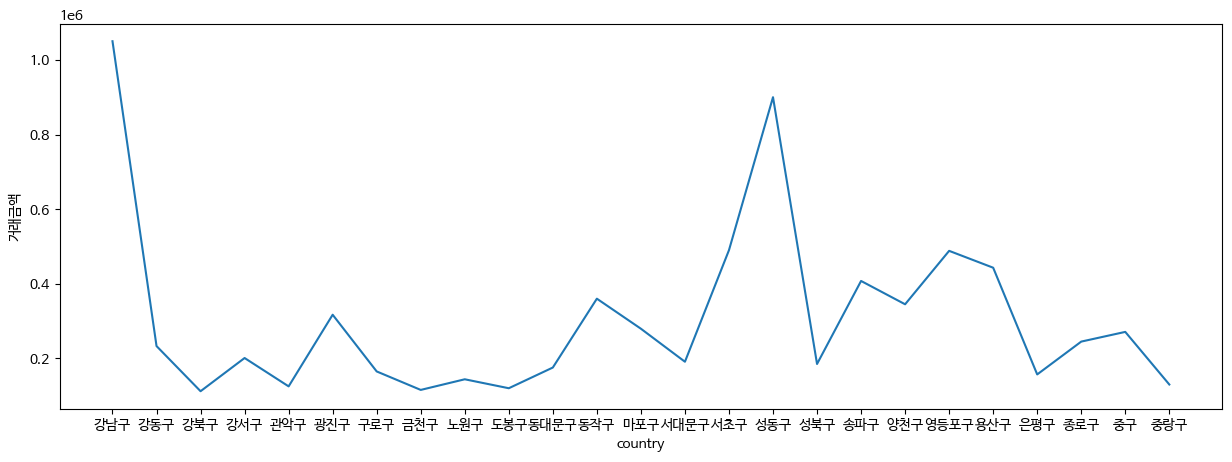

In [303]:
plt.figure(figsize=(15,5))
sns.lineplot(data=gu_max)
plt.show()

## 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [304]:
# 광역시도별 아파트 가격 개수
pro_count = apt.groupby(by=['province'])['거래금액'].count()

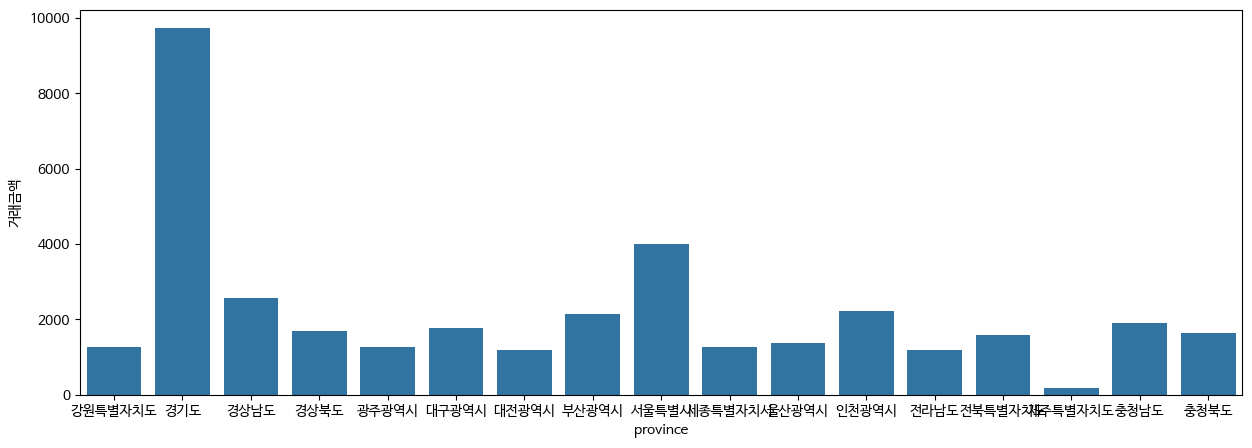

In [305]:
plt.figure(figsize=(15,5))
sns.barplot(pro_count)
plt.show()

In [306]:
# 광역시도별 아파트 가격 평균
pro_mean = apt.groupby(by=['province'])['거래금액'].mean()

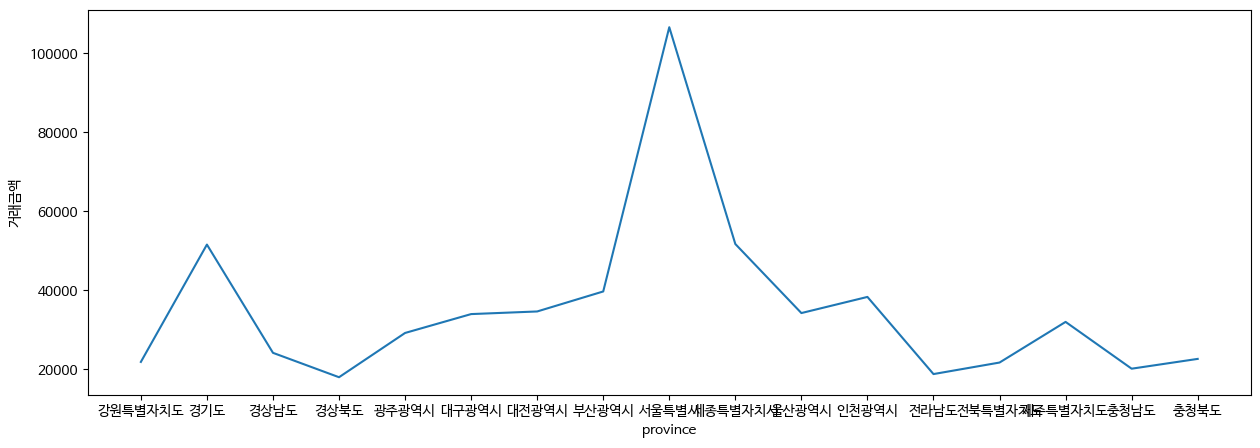

In [307]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_mean)
plt.show()

In [308]:
# 광역시도별 아파트 가격 최솟값
pro_min = apt.groupby(by=['province'])['거래금액'].min()

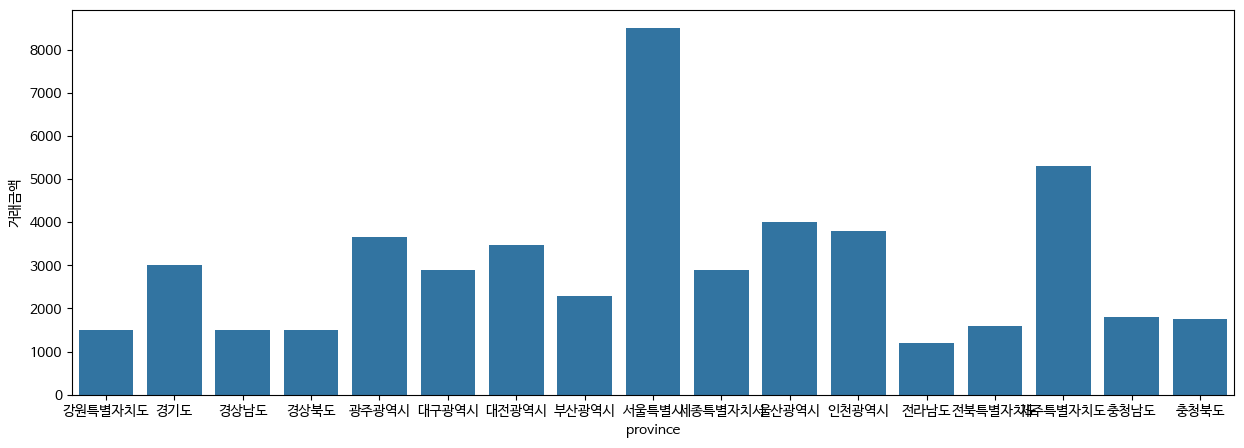

In [309]:
plt.figure(figsize=(15,5))
sns.barplot(pro_min)
plt.show()

In [310]:
# 광역시도별 아파트 가격 최댓값
pro_max = apt.groupby(by=['province'])['거래금액'].max()

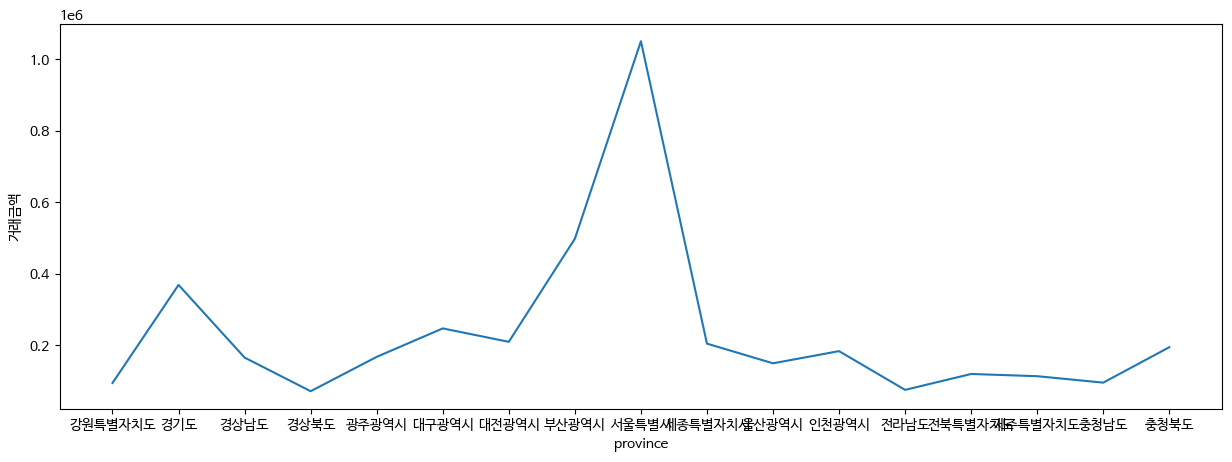

In [311]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_max)
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [313]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 구하기
goal_df = apt[(apt['province'] == '서울특별시') & (apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [315]:
# 구별 아파트 가격 개수
goal_count = goal_df.groupby(by=['country'])['거래금액'].count()

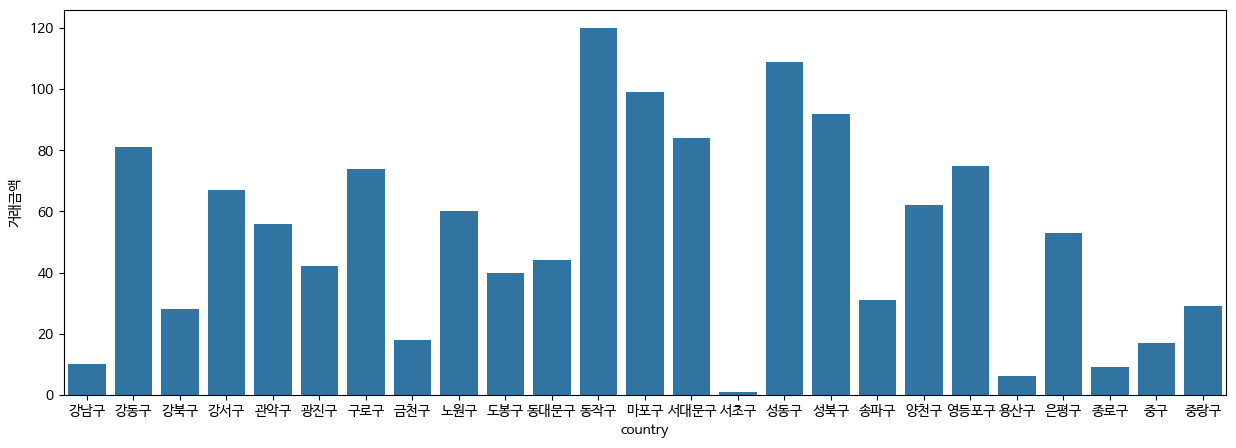

In [316]:
plt.figure(figsize=(15,5))
sns.barplot(goal_count)
plt.show()

In [317]:
# 구별 아파트 가격 평균
goal_mean = goal_df.groupby(by=['country'])['거래금액'].mean()

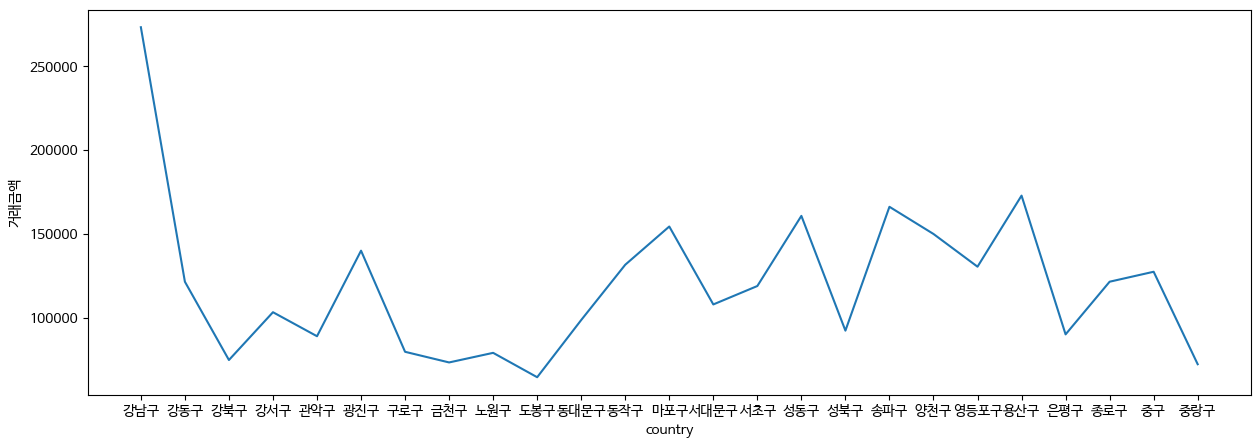

In [318]:
plt.figure(figsize=(15,5))
sns.lineplot(goal_mean)
plt.show()

In [319]:
# 구별 아파트 가격 최솟값
goal_min = goal_df.groupby(by=['country'])['거래금액'].min()

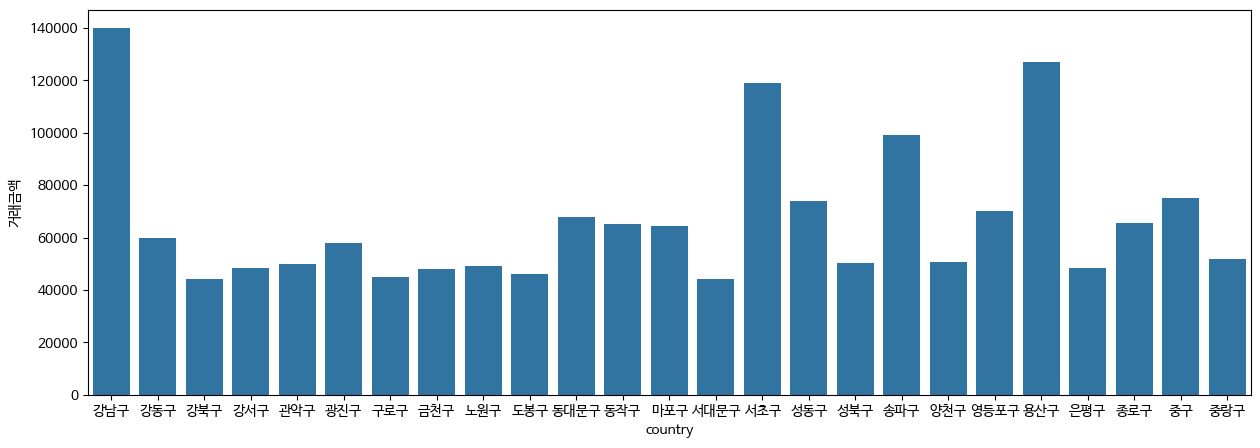

In [320]:
plt.figure(figsize=(15,5))
sns.barplot(goal_min)
plt.show()

In [321]:
# 구별 아파트 가격 최댓값
goal_max = goal_df.groupby(by=['country'])['거래금액'].max()

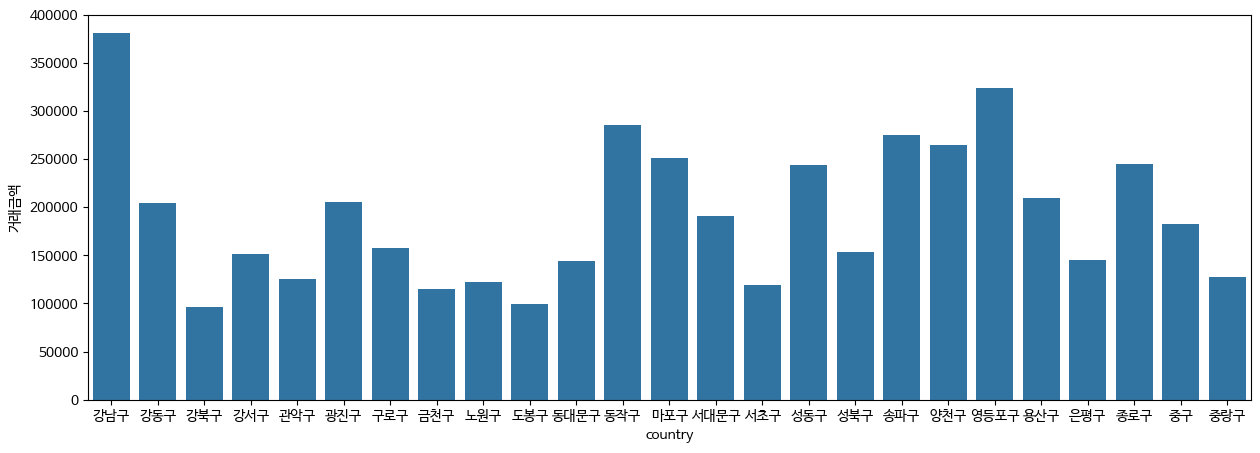

In [322]:
plt.figure(figsize=(15,5))
sns.barplot(goal_max)
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 중에서, 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [324]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 구하기
apt_space = apt[(apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [325]:
# 광역시도별 아파트 가격 개수
space_count = apt_space.groupby(by='province')['거래금액'].count()

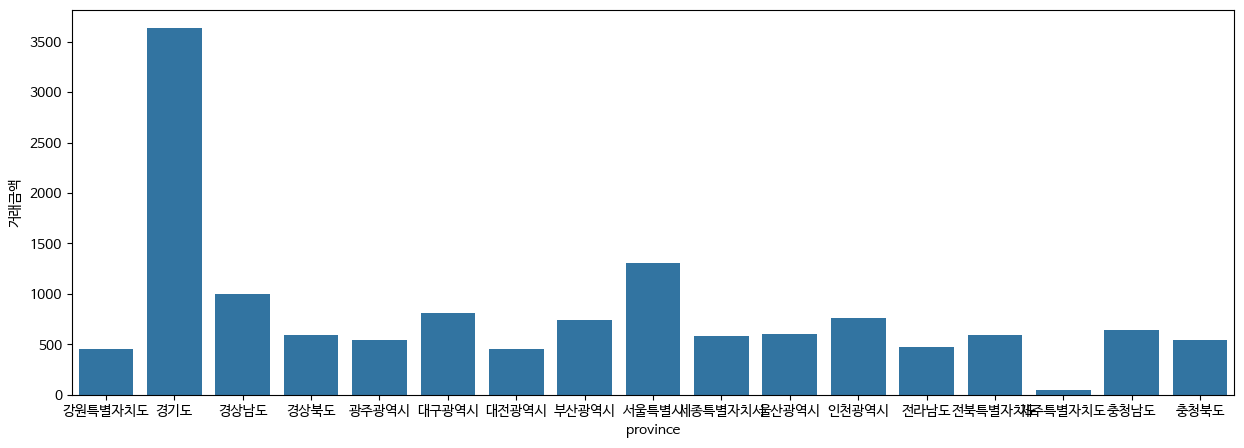

In [326]:
plt.figure(figsize=(15,5))
sns.barplot(space_count)
plt.show()

In [327]:
# 광역시도별 아파트 가격 평균
space_mean = apt_space.groupby(by='province')['거래금액'].mean()

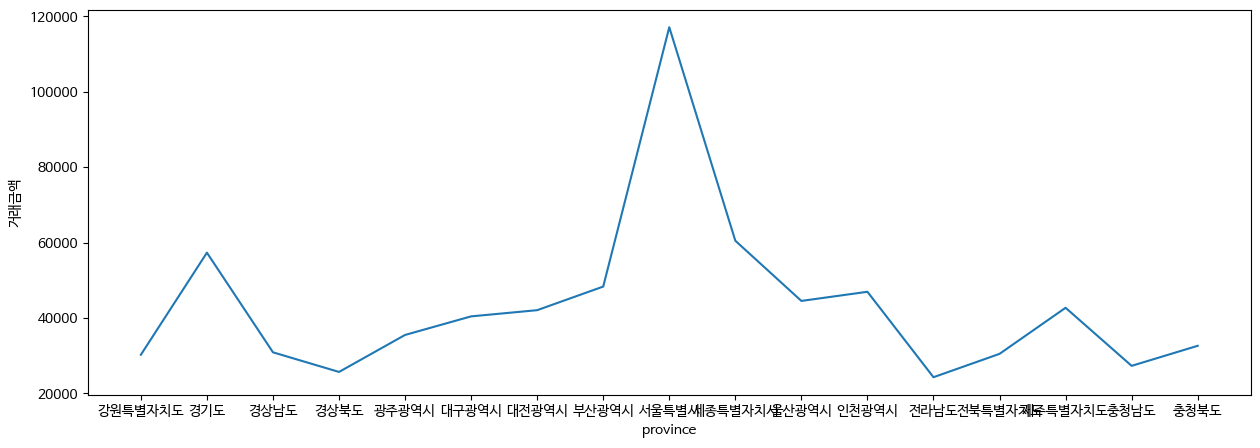

In [328]:
plt.figure(figsize=(15,5))
sns.lineplot(space_mean)
plt.show()

In [329]:
# 광역시도별 아파트 가격 최솟값
space_min = apt_space.groupby(by='province')['거래금액'].min()

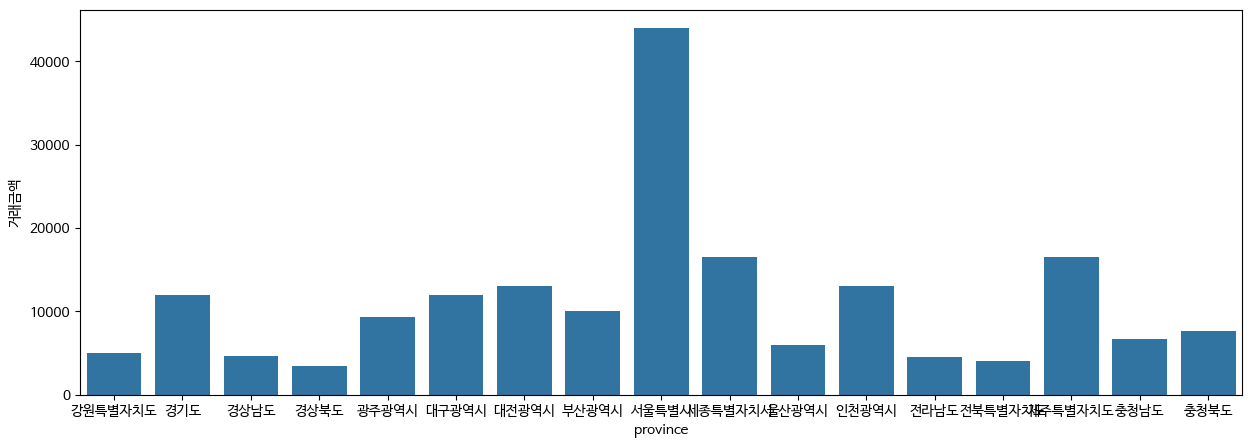

In [330]:
plt.figure(figsize=(15,5))
sns.barplot(space_min)
plt.show()

In [331]:
# 광역시도별 아파트 가격 최댓값
space_max = apt_space.groupby(by='province')['거래금액'].max()

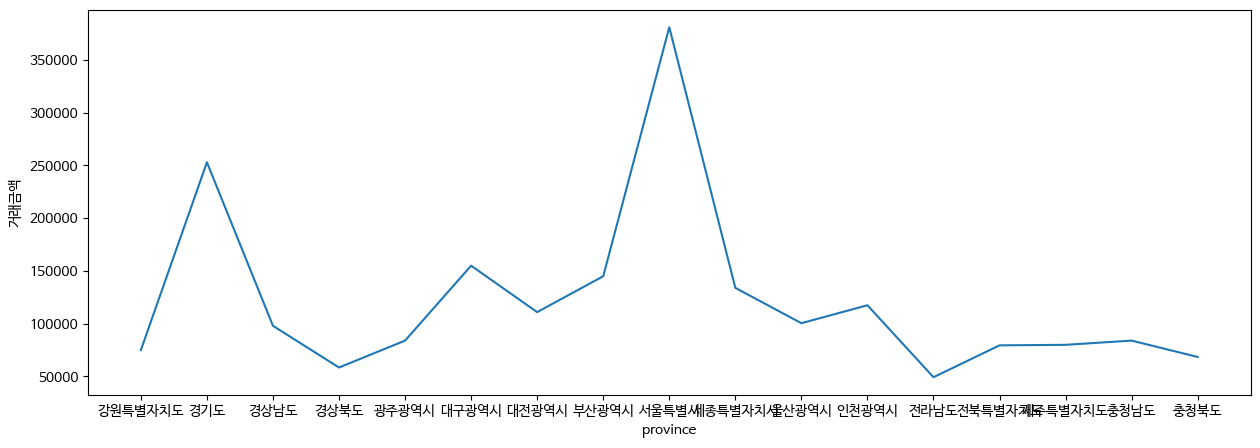

In [332]:
plt.figure(figsize=(15,5))
sns.lineplot(space_max)
plt.show()

### 결과를 평균의 내림차순으로 정렬해서 출력

In [333]:
# mean_ascend_f = apt_space.sort_values('거래금액(만원)', ascending=False)
# mean_ascend_f.head()
apt_space['거래금액'].mean()

np.float64(50266.97235925711)

### 결과를 최댓값의 내림차순으로 정렬해서 출력

In [334]:
mean_ascend_f = apt_space.sort_values('거래금액', ascending=False)
mean_ascend_f.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
24620,24621,서울특별시 강남구 압구정동,490,490,0,한양1차(영동한양),91.210,202504,10,381000,...,1977,압구정로 321,NaT,직거래,NaN,NaT,서울특별시,강남구,2025,04
12931,12932,서울특별시 강남구 개포동,1281,1281,0,디에이치아너힐즈,84.357,202504,18,350000,...,2019,삼성로 11,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04
32977,32978,서울특별시 영등포구 여의도동,525,525,0,브라이튼여의도,84.132,202504,3,324000,...,2023,국제금융로 39,NaT,중개거래,서울 영등포구,NaT,서울특별시,영등포구,2025,04
36551,36552,서울특별시 강남구 대치동,65,65,0,쌍용대치2,84.490,202504,1,312000,...,1983,영동대로 220,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04
9233,9234,서울특별시 강남구 삼성동,16-2,16,2,삼성동힐스테이트 1단지,84.236,202504,21,310000,...,2008,학동로68길 29,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,04


### 결과를 최솟값의 오름차순으로 정렬해서 출력

# 서울특별시 아파트 가격의 최솟값, 최댓값, 평균이 매우 높게 상승되어 있음
# 전반적으로 서울 모든 지역의 아파트 가격이 높은 것인지 특정 지역에만 몰려 있는지 확인

In [336]:
seoul_mean = seoul.groupby('country')['거래금액'].mean()

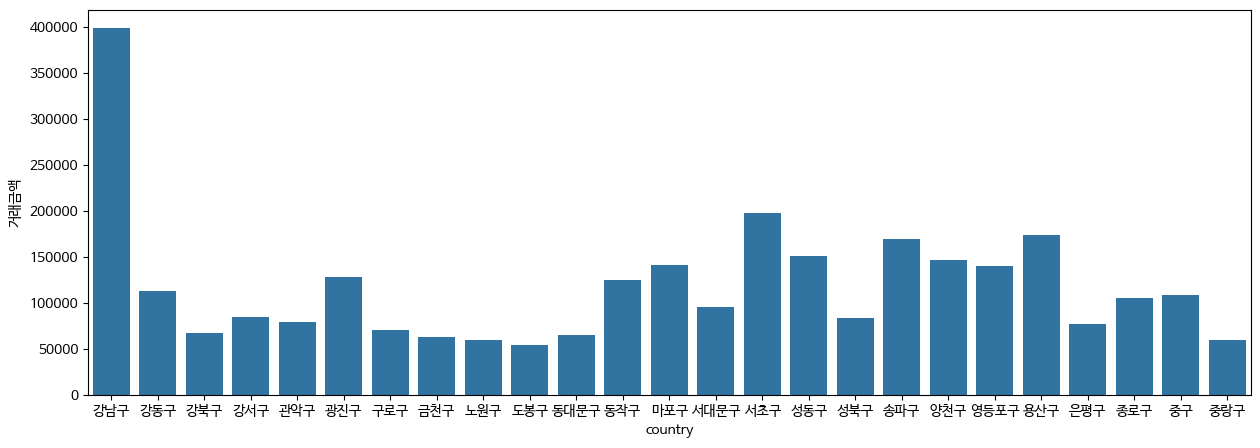

In [338]:
plt.figure(figsize=(15,5))
sns.barplot(seoul_mean)
plt.show()

강남구에만 아파트 가격의 평균이 매우 높으며 그다음으로는 서초구, 요안구, 송파구 순서지만 비슷한 수준으로 보여짐 (200,000)만원

그렇다면 다른 지역의 평균이나 최댓값도 이와 비슷한 지 확인

In [342]:
not_seoul = apt[~(apt.province == '서울특별시')]
not_seoul_mean = not_seoul.groupby('country')['거래금액'].mean()

In [346]:
not_seoul_mean.sort_values(ascending=False)

,거래금액
country,
과천시,194803.392857
성남시,112483.646934
하남시,90988.541667
나성동,78109.523810
어진동,77696.551724
...,...
정선군,7067.857143
봉화군,6600.000000
전의면,6600.000000


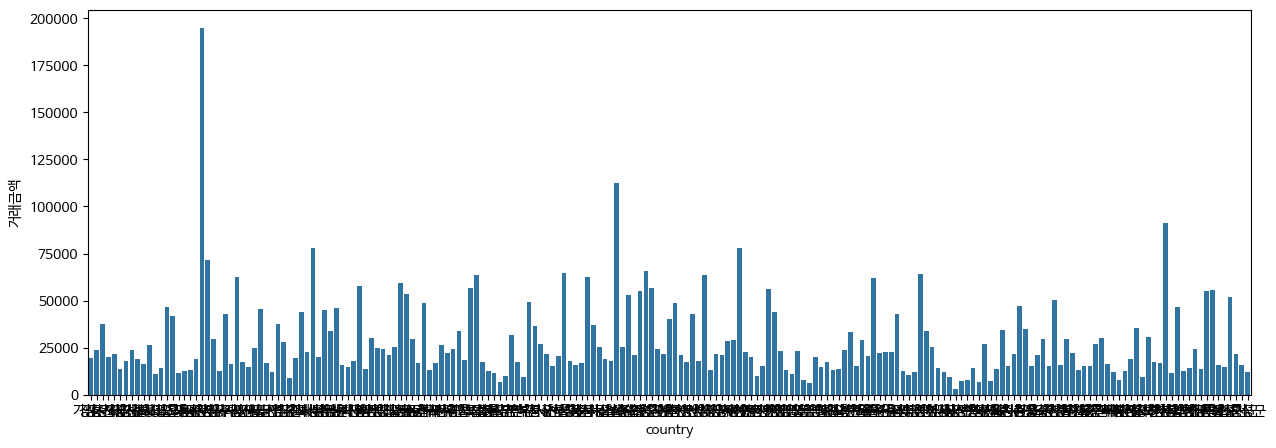

In [343]:
plt.figure(figsize=(15,5))
sns.barplot(not_seoul_mean)
plt.show()

확인해 봤을 때 과천시가 19,4803(만원), 성남시가 112,483(만원), 하남시가 90,988(만원) 순서로 많습니다.

그렇지만 서울특별시와 비교해봤을때 절반에 못 미치는 가격으로 결국 전국적으로 살펴봐도 서울의 아파트 가격이 매우 높게 형성되어 있고(평균적으로) 타 지역의 일부 아파트 가격이 높아보이지만 서울과 비교해보면 서초구, 용산구와 비슷한 수준으로 그 수도 몇 개 되지 않으며 일반적으로 살펴보면 서울의 아파트 가격 평균이 높게 형성되어 있음을 확인할 수 있습니다.

# 전용면적에 따른 거래금액의 차이가 있는지, 거래 유형이 어떻게 이루어지는지 확인

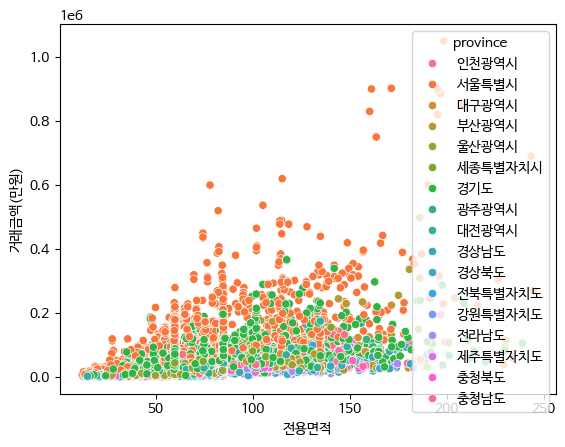

In [430]:
# 전용면적, 거래금액(만원)
# apt.groupby(by=['전용면적'])['거래금액(만원)'].
sns.scatterplot(data=apt, x='전용면적', y='거래금액(만원)', hue='province')
plt.show()

인천광역시, 서울특별시, 대구광역시, 부산광역시, 울산광역시, 세종특별자치시, 경기도, 광주광역시, 대전광역시, 경상남도, 경상북도, 전북특별자치도, 강원특별자치도, 전라남도, 제주특별자치도, 충청북도, 충청남도

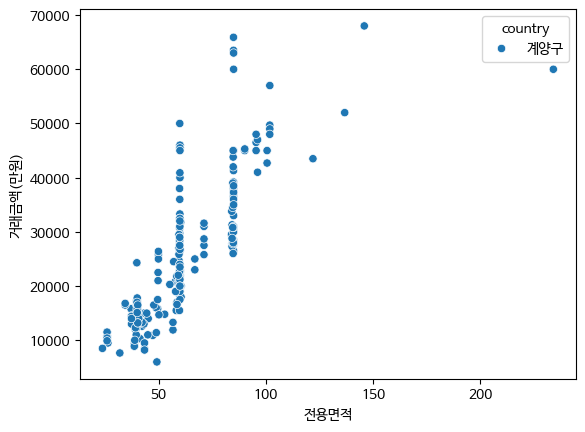

In [474]:
# 인천지역의 전용면적 별 거래금액
incheon = apt[apt.province == '인천광역시']
incheon = apt[(apt.province == '인천광역시') & (apt.country == '남동구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '부평구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '동구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '계양구')]
sns.scatterplot(data=incheon, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

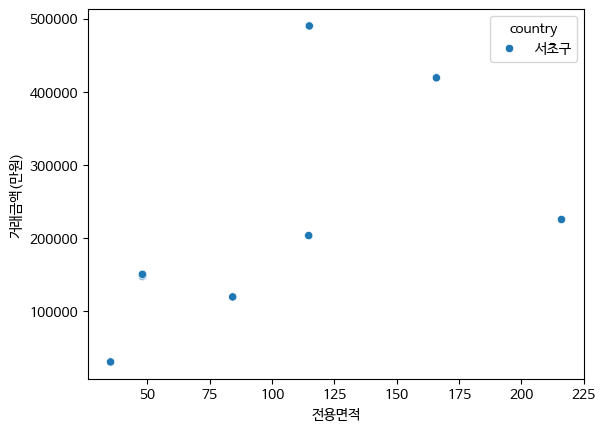

In [469]:
# 서울의 전용면적 별 거래금액
seoul = apt[apt.province == '서울특별시']
seoul = apt[(apt.province == '서울특별시') & (apt.country == '성동구')]
seoul = apt[(apt.province == '서울특별시') & (apt.country == '강남구')]
seoul = apt[(apt.province == '서울특별시') & (apt.country == '서초구')]
sns.scatterplot(data=seoul, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

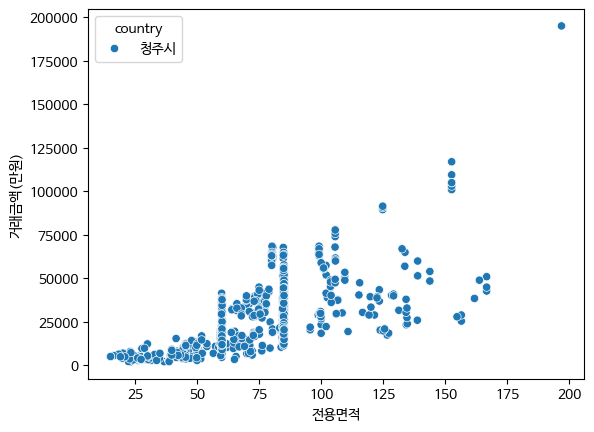

In [467]:
# 충청북도 전용면적 별 거래금액
north_chung = apt[apt.province == '충청북도']
north_chung = apt[(apt.province == '충청북도') & (apt.country == '청주시')]
# north_chung = apt[(apt.province == '충청북도') & (apt.country == '충주시')]
# north_chung = apt[(apt.province == '충청북도') & (apt.country == '단양군')]
sns.scatterplot(data=north_chung, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

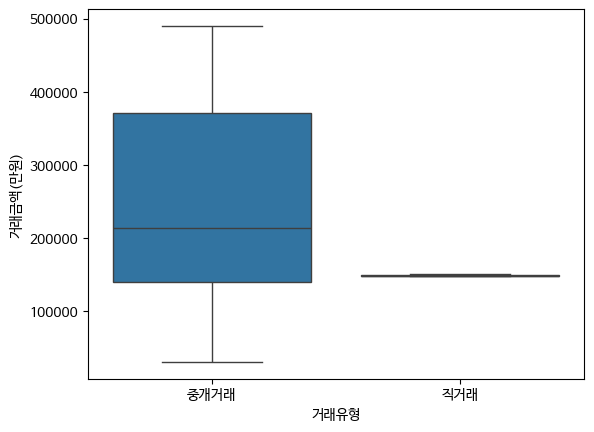

In [491]:
# 서울의 거래 유형 확인
sns.boxplot(data=seoul, x='거래유형', y='거래금액(만원)')
plt.show()

서울의 경우 거의 대부분이 '중개거래'로 이루어지며 '직거래'는 수요가 거의 없음.

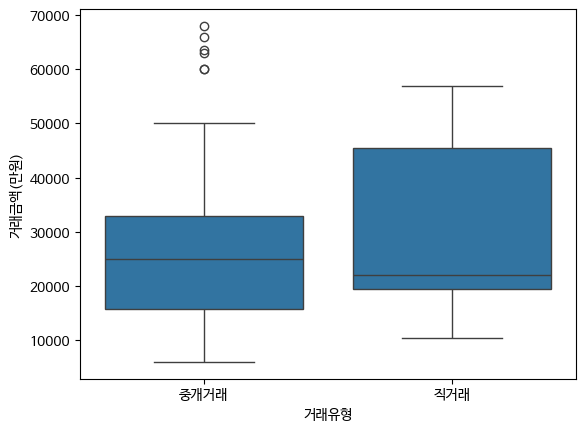

In [493]:
# 인천의 거래 유형 확인
sns.boxplot(data=incheon, x='거래유형', y='거래금액(만원)')
plt.show()

인천의 경우 중개거래와 직거래 모두 수요가 있이며 직거래의 경우가 금액대가 더 높은 경우가 많은것으로 보여짐

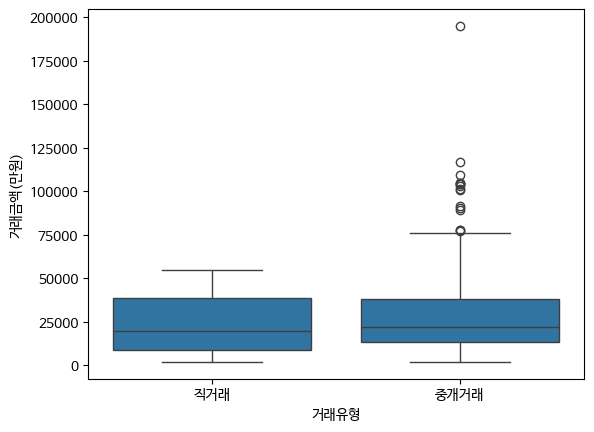

In [494]:
# 충청북도 거래 유형 확인
sns.boxplot(data=north_chung, x='거래유형', y='거래금액(만원)')
plt.show()

충청북도의 경우 직거래와 중개거래의 수요는 비슷함. 다만 중개거래의 경우 간혹 비정상적으로 높은 금액으로 거래가 이루어지기도 함. 직거래는 그런 경우가 없음.

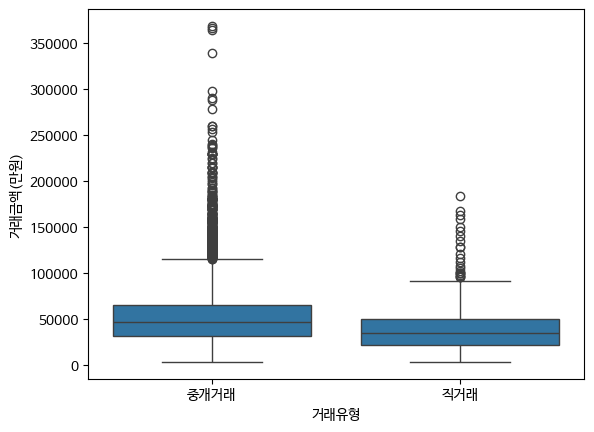

In [495]:
# 경기도 거래 유형 확인
gunggido = apt[apt.province == '경기도']
sns.boxplot(data=gunggido, x='거래유형', y='거래금액(만원)')
plt.show()

경기도도 중개거래와 직거래의 50%는 비슷한 거래금액으로 진행되지만 극단적인 경우의 값(15억을 넘어가는) 거래는 '중개거래'가 압도적으로 많음

# 건축년도별 전용면적의 차이

In [475]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4
